In [32]:
# importing all the libraries needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # for plots

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

# building different models to find the one w/ th emost accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


## we will ignore unnecessary warnings.
import warnings
warnings.filterwarnings('ignore')

In [9]:
#Loading the data
df = pd.read_csv('./diabetes.csv') #from Pima Indians Diabetes Database

In [10]:
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### we will read the data

In [13]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### We will now check if there is any null value present in the dataset.

In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Since there is no null values in the data, we will now describe the data to get a rough idea of what we are dealing with. 

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


As seen above, the age of people in the data ranges from 21-81, with 50% of them being 29. There are also no categorical variables.

### Exploratory Data Analysis

<AxesSubplot:ylabel='Outcome'>

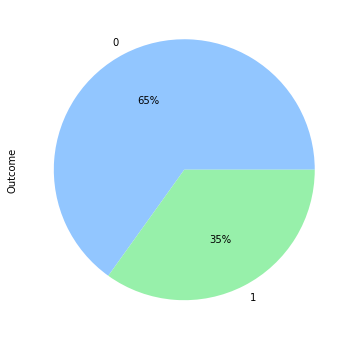

In [24]:
import matplotlib.style as style

style.use('seaborn-pastel')
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(6,6))

So, 65% of the people are healthy while the other 35% are diabetic.

##### we will now analyze diabetes patients distribution over age. 

<AxesSubplot:xlabel='Age', ylabel='count'>

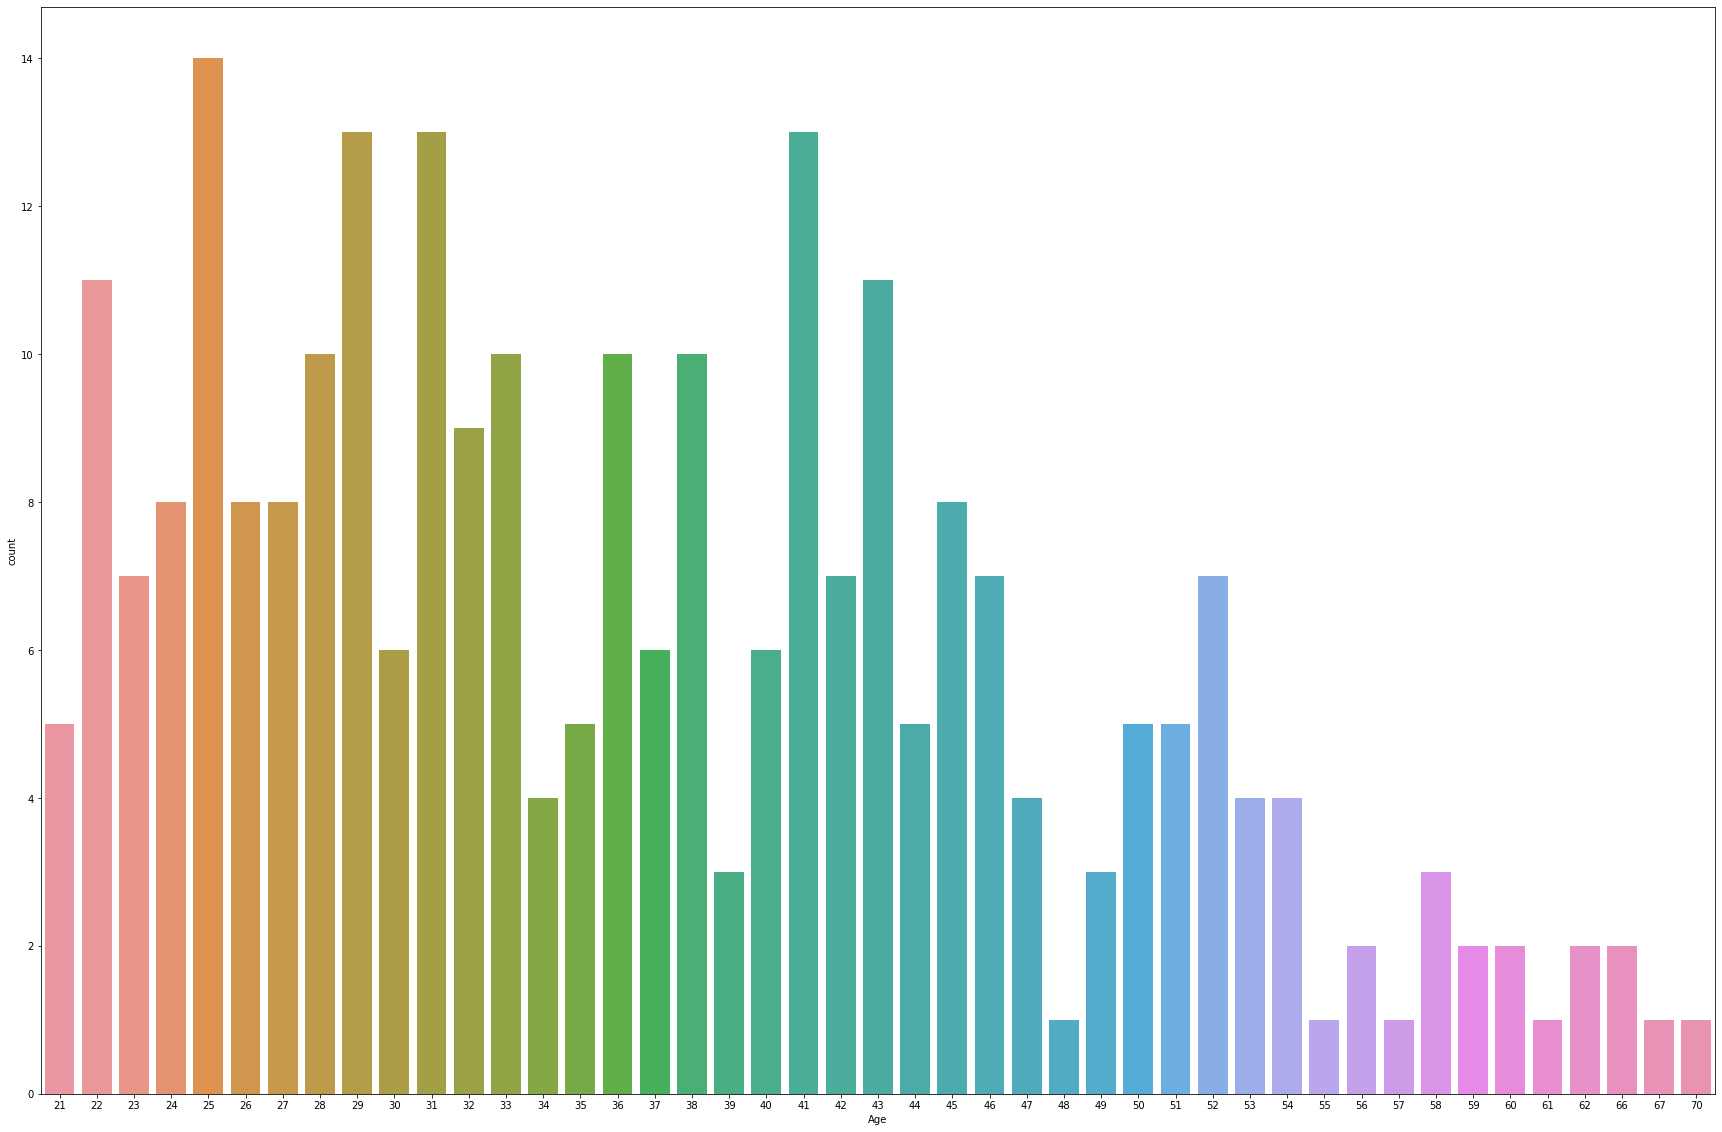

In [33]:
data = df[df['Outcome']==1]['Age']
plt.figure(figsize=(30, 20))
sns.countplot(data)

We can see that the patients with diabetes are mostly around the age 20-40 year olds.

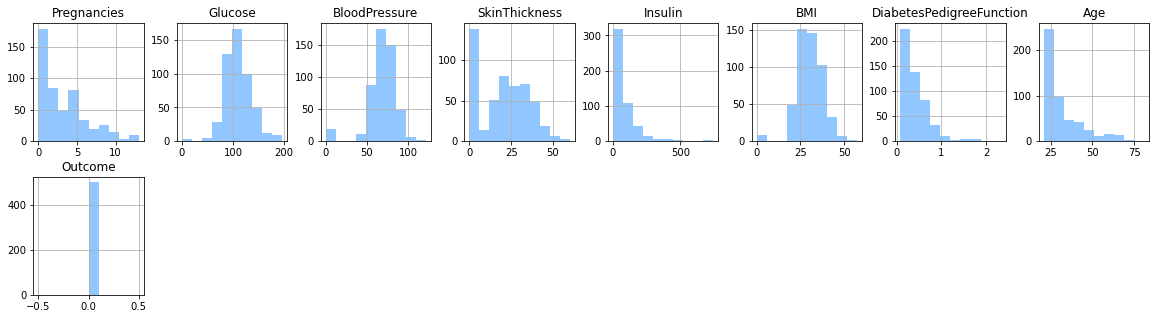

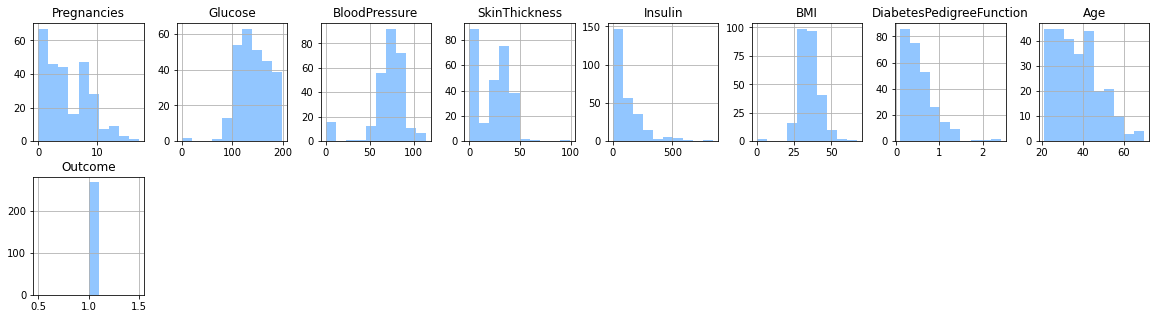

In [42]:
## let's plot each variable with respect to outcome variable to see how each variable impacts the outcome variable.

df.groupby('Outcome').hist(figsize=(20, 5), layout=(2,8))
plt.show()

<AxesSubplot:>

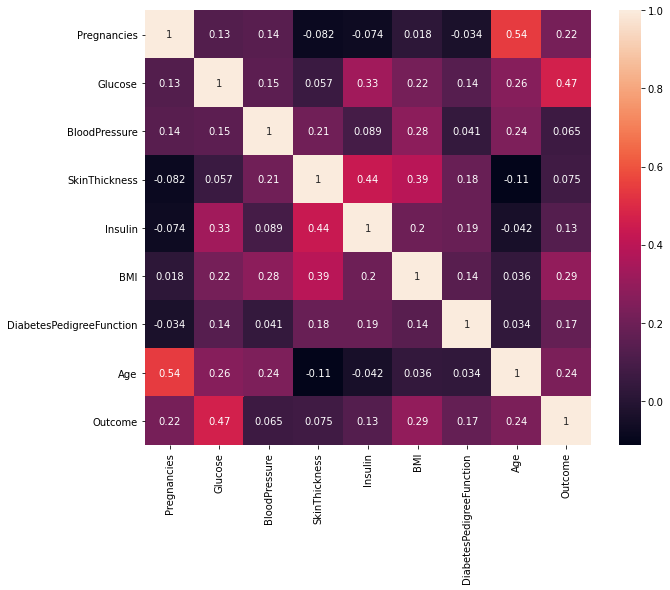

In [44]:
# we will then plot correlation matrix using a heatmap since it helps identify patterns and visualize the concentration of values between 2 dimensions of a matrix.
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

From the heatmap, we notice that age and pregnancies are highly correlated, and glucose and outcome are highly correlated.

#### Training and Testing

In [121]:
## so we will split the data into training and testing.

y = df['Outcome']
x = df.drop(columns=['Outcome'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [122]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Random Forest Classifier

In [123]:
rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [124]:
RandomForestClassifierScore = rf.score(X_test, y_test)
print("Accuracy obtained from Random Forest Classifier model:",RandomForestClassifierScore*100)

Accuracy obtained from Random Forest Classifier model: 75.32467532467533


Finally, we will look at the Confusion Matrix to summarize how the classification algorithm performed. 

<AxesSubplot:>

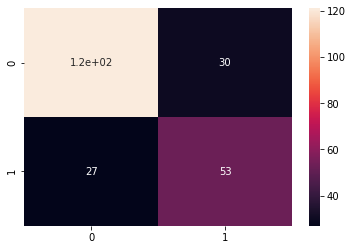

In [125]:

from sklearn.metrics import confusion_matrix
y_pred = rf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True)


So, the Random Forest Classifier is 75% accurate.

### Now we will find the most significant variables that affect diabetes patients. 